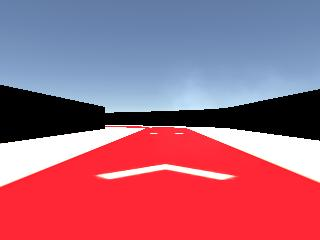

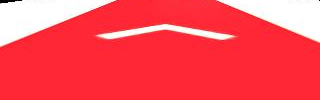

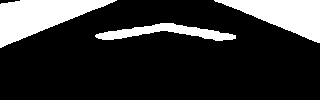

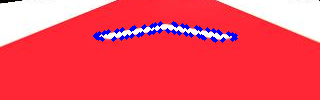

not reverse


In [5]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import math
   
    
def get_lane_coordinate(img):
  img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  r1_mask = cv2.inRange(img_hsv, (0,100,120), (10,255,255))
  r2_mask = cv2.inRange(img_hsv, (170,100,120), (180,255,255))
  mask = np.repeat((r1_mask | r2_mask)[:, :, np.newaxis], 3, axis=2)
  img_masked = img.copy()
  img_masked[mask == 0] = 0       
  #cv2_imshow(mask)
  _,contours, hierarchy	= cv2.findContours((r1_mask|r2_mask), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > 2000:
      x,y,w,h = cv2.boundingRect(cnt)   
      #cv2_imshow(img[y:y+h,x:x+w].copy())
      return x,y,w,h
    
def reverse_check(img,check=False):
  img_blur = cv2.medianBlur(img, 5)
  img_hsv = cv2.cvtColor(img_blur.copy(), cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(img_hsv, (0, 0, 200),(200, 200, 255))
  show(mask)
  _, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  for cnt in contours:
      area = cv2.contourArea(cnt)        
      x, y, w, h = cv2.boundingRect(cnt) 
      if check == False:
        if lanex < x and laney < y:
          temp_mask = img[y:y + h, x:x + w].copy()              
          aaa = cv2.drawContours(img.copy(), cnt, -1, (255,0,0),4)        
          cv2_imshow(aaa)
          print(' ')
          cv2_imshow(temp_mask)
          print(' ')
          cv2_imshow(temp_mask[0:temp_mask.shape[0],math.floor(temp_mask.shape[1] / 3):math.floor(temp_mask.shape[1] / 3)*2])
          print(' ')
          reverse_check(temp_mask[0:temp_mask.shape[0],math.floor(temp_mask.shape[1] / 3):math.floor(temp_mask.shape[1] / 3)*2],True)
      else:
        if y != 0:
          print('reverse')
          break
        else:
          print('not reverse')
          break

direction_color = [(200,200, 200),(255,255, 255)]      
img = cv2.imread('2-1.jpg')
cv2_imshow(img)
print(' ')
img = img[140:240,0:320]
cv2_imshow(img)
print(' ')
lanex,laney,lanew,laneh = get_lane_coordinate(img)
#print(lanex,laney,lanew,laneh)
reverse_check(img)
   